In [2]:
import pandas as pd 
import xml.etree.ElementTree as et 
import matplotlib.pyplot as plt

def id_plot():
    bins_list = []
    for i in range(0, 3000, 100):
        bins_list.append(i)
    #print("List", bins_list)
    return bins_list

def oficina_plot():
    bins_list = []
    for i in range(0, 3000, 100):
        bins_list.append(i)
    #print("List", bins_list)
    return bins_list



xtree = et.parse("xml_csv.xml")
xroot = xtree.getroot() 

df_cols = ['d_tipo_asentamiento', 'id_asenta_cpcons','c_oficina']
rows = []

for node in xroot: 
    s_d_tipo_asentamiento = node.find("d_tipo_asentamiento").text
    s_id_asenta_cpcons = node.find("id_asenta_cpcons").text
    s_c_oficina = node.find("c_oficina").text 
    
    rows.append({"d_tipo_asentamiento": s_d_tipo_asentamiento, "id_asenta_cpcons": s_id_asenta_cpcons, 
                 "c_oficina": s_c_oficina})

df = pd.DataFrame(rows, columns = df_cols)

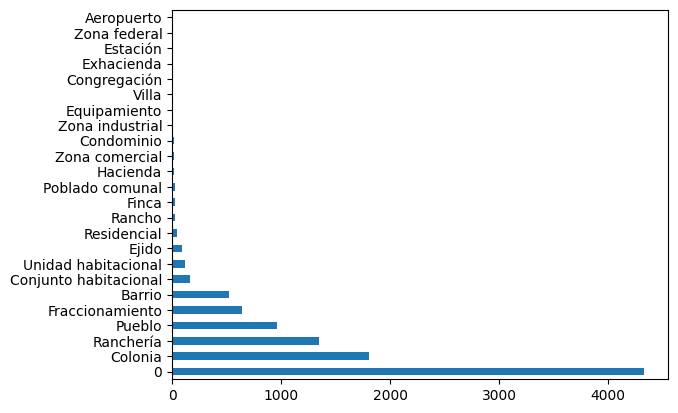

In [6]:
d_tipo_asentamiento_plot = df['d_tipo_asentamiento'].value_counts().plot(kind='barh')
plt.savefig('diagrams/d_tipo_asentamiento_plot.png')
plt.show()

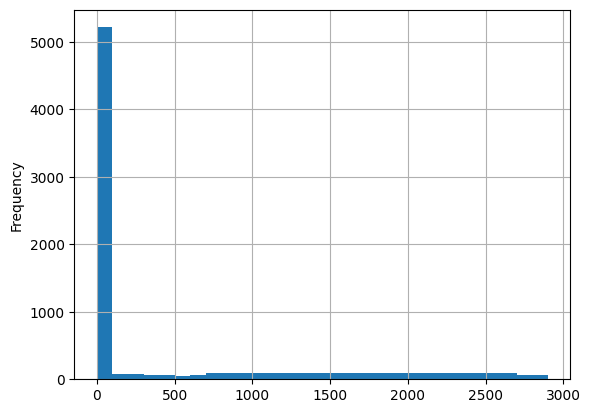

In [4]:
#id_asenta_cpcons_max = df['id_asenta_cpcons'].astype(int).max()
id_asenta_cpcons_plot = df['id_asenta_cpcons'].astype(int).plot.hist(grid=True, bins=id_plot())
plt.savefig('diagrams/id_asenta_cpcons_plot.png')
plt.show()

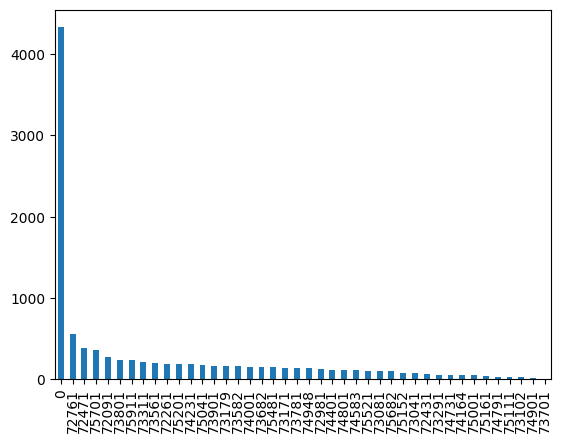

In [5]:
c_oficina_plot = df['c_oficina'].astype(int).value_counts().plot.bar()
plt.savefig('diagrams/c_oficina_plot.png')
plt.show()

#values = pd.Series(df['id_asenta_cpcons'].astype(int))
#id_asenta_cpcons_plot = values.plot.hist(grid=True, bins=id_plot())